In [1]:
from epyc import JSONLabNotebook
import epydemic
import numpy as np
import pandas as pd
from epydemic import SEIR, Monitor
import string
from parameters import *

# Read gathered data and create dataframes.

In [2]:
json_lab_1 = JSONLabNotebook(get_out_path("ex_1_seir"), create=False)
json_lab_2 = JSONLabNotebook(get_out_path("ex_2_seir"), create=False)

In [3]:
dfs_1 = [json_lab_1.dataframe(tag=rs) for rs in json_lab_1.resultSets()]
dfs_2 = [json_lab_2.dataframe(tag=rs) for rs in json_lab_2.resultSets()]
dfs = dfs_1 + dfs_2

# Concatenate dataframes to combine all simulations.
df = pd.concat(dfs)

## Get the outbreak size for all simulations at the defualt timeout and at equilibrium.

In [4]:
# Creat columns for the outbreak size for all simulations at the defualt timeout and at equilibrium as a fraction of the total population
er_sss_SEIR_1 = np.array(df[Monitor.timeSeriesForLocus(epydemic.SEIR.REMOVED)].values)
df["R-Timeout"] = np.array([s[1] for s in er_sss_SEIR_1]) / n
df["R-Equilibrium"] = df[SEIR.REMOVED] / n

In [5]:
# Create a dataframe to hold information on underveloped simulations at the default timeout.
df_eq = df[df["R-Timeout"] != df["R-Equilibrium"]]

# Data Visualization of Outbreak Size at Default Timeout and Equilibrium

/tmp/ipykernel_346642/2896514439.py:21: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax1.plot(mean_to, 'k.', marker="s", label="Ensemble\nAverage",  markersize=3)
/tmp/ipykernel_346642/2896514439.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "k." (-> marker='.'). The keyword argument will take precedence.
  ax2.plot(mean_eq, 'k.', marker="s", label="Ensemble Average",  markersize=3)


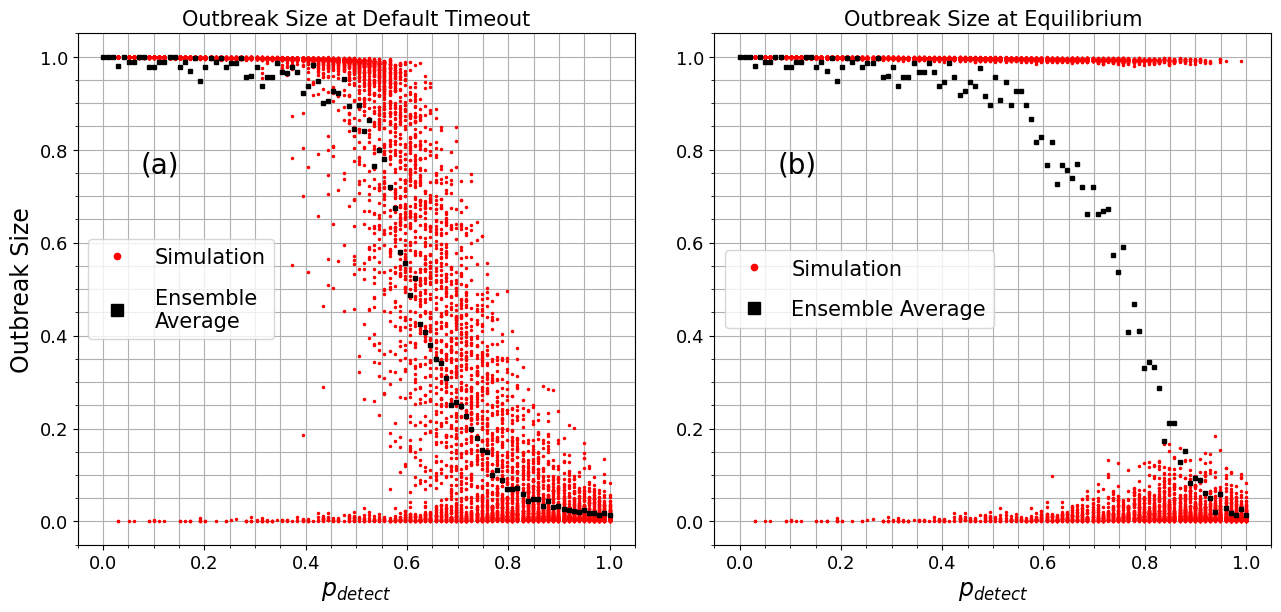

In [6]:
fig, axs = plt.subplots(1,2,  figsize=(13,6))
(ax1, ax2) = axs

fig.tight_layout(h_pad=1)

# Label Each Subplot
labels = string.ascii_lowercase
for i, ax in enumerate(axs):
    ax.text(0.075, 0.75, f"({labels[i]})", fontsize=20)


# Calculate mean values from repeated experiments.
mean_eq = df.groupby('pDetect')["R-Equilibrium"].mean() 
mean_to = df.groupby('pDetect')["R-Timeout"].mean() 

# Plot Raw Data
ax1.plot(df["pDetect"], df["R-Timeout"], 'r.', label="Simulation", markersize=3)
ax2.plot(df["pDetect"], df["R-Equilibrium"], 'r.', label="Simulation", markersize=3)

# Plot Mean Data
ax1.plot(mean_to, 'k.', marker="s", label="Ensemble\nAverage",  markersize=3)
ax2.plot(mean_eq, 'k.', marker="s", label="Ensemble Average",  markersize=3)

# Set Titles
ax1.set_title('Outbreak Size at Default Timeout')
ax2.set_title('Outbreak Size at Equilibrium')
ax1.set_xlabel('$p_{detect}$')
ax2.set_xlabel('$p_{detect}$')
ax1.set_ylabel('Outbreak Size')
# ax2.set_ylabel('Outbreak Size')

# Set Gridlines
ax1.grid(which = "both")
ax1.minorticks_on()

ax2.grid(which = "both")
ax2.minorticks_on()

# Set Legend
ax1.legend(loc="center left", labelspacing=1)
ax2.legend(loc="center left", labelspacing=1)

_ = plt.show()